In [26]:
import tweepy as tw
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [27]:
consumer_key=''
consumer_secret=''
access_token=''
access_token_secret=''

In [28]:
#Authenticating O-Auth
# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)

In [29]:
##Choose tweets for a certain hashtag
#We'll use tweepy cursor for that

# hashtag1=input("Enter the first crypto code")
# hashtag2=input("Enter the second Crypto code")
hashtag1='#DOGE'
hashtag2='#SHIB'
query=tw.Cursor(api.search_tweets,q=hashtag1).items(10000)
doge_tweets=[{'Tweets':tweet.text,'Timestamp':tweet.created_at} for tweet in query]
query=tw.Cursor(api.search_tweets,q=hashtag2).items(10000)
shib_tweets=[{'Tweets':tweet.text,'Timestamp':tweet.created_at} for tweet in query]


Rate limit reached. Sleeping for: 793
Rate limit reached. Sleeping for: 795
Rate limit reached. Sleeping for: 798
Rate limit reached. Sleeping for: 797
Rate limit reached. Sleeping for: 791
Rate limit reached. Sleeping for: 791
Rate limit reached. Sleeping for: 793
Rate limit reached. Sleeping for: 793


In [30]:
df_doge=pd.DataFrame.from_dict(doge_tweets)
df_shib=pd.DataFrame.from_dict(shib_tweets)
df_doge.head()
df_shib.head()

,Tweets,Timestamp
0,Heyyyyyyyy @RobinhoodApp I love #SHIB because ...,2022-01-19 13:51:53+00:00
1,RT @MetaGiveaway: ❤️I´ll give 5.200.000.000 #S...,2022-01-19 13:51:52+00:00
2,RT @MeganTerra7: Good morning!❤️ \nIf I send ...,2022-01-19 13:51:52+00:00
3,RT @100XCryptoGem: Which #Crypto Has The Stron...,2022-01-19 13:51:51+00:00
4,RT @dunscoly: #marvin...... Has prepare a plac...,2022-01-19 13:51:51+00:00


In [31]:
print("Shape of DOGE dataFrame = ", df_doge.shape)
print("Shape of SHIB dataFrame = ", df_shib.shape)

Shape of DOGE dataFrame =  (10000, 2)
Shape of SHIB dataFrame =  (10000, 2)


In [32]:
doge_handle = ['Doge', 'DOGE to the moon', 'DOGE', 'DOGECOIN', 'DOGE\'s']
shib_handle = ['Shib', 'SHIB to the moon', 'SHIB', 'SHIBA INU','SHIBETOSHI NAKAMOTO','SHIB\'s']

In [33]:
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag


df_doge['DOGE'] = df_doge['Tweets'].apply(lambda x: identify_subject(x, doge_handle))
df_shib['SHIB'] = df_shib['Tweets'].apply(lambda x: identify_subject(x, shib_handle)) 

df_shib.head(10)
df_doge.head(10)


,Tweets,Timestamp,DOGE
0,RT @DogeKnight_bsc: 🔥DogeKnight: The first P2E...,2022-01-19 12:50:56+00:00,1
1,RT @IAmDogeBot: Current #DOGE Price is $0.1654...,2022-01-19 12:50:51+00:00,1
2,RT @KriptoUzmanim: 1 Kişiye 500TL Çekilişi !! ...,2022-01-19 12:50:48+00:00,0
3,"RT @FlokiMooni: Dear Flokimoonies,\nwe are hap...",2022-01-19 12:50:46+00:00,0
4,RT @Vforrkripto: 7ay Önce Bu Hesapta 6-7 Kişi...,2022-01-19 12:50:41+00:00,0
5,"👑@kingforeverbsc👑 Bridged bridge 🌉 is coming, ...",2022-01-19 12:50:38+00:00,0
6,RT @Moon_Elon_doge: #mission_moon \n#MED_SOLDI...,2022-01-19 12:50:35+00:00,1
7,RT @egeharputlu_: 🔥 #ÇEKİLİŞ 🔥\n\n1 Kişiye 2 a...,2022-01-19 12:50:24+00:00,0
8,RT @BrandonColl_: I have 10 #BNB to invest in...,2022-01-19 12:50:15+00:00,0
9,RT @GenXdoger: #doge #dogecoin https://t.co/Gp...,2022-01-19 12:50:11+00:00,0


In [34]:
df = [df_doge, df_shib]
result = pd.concat(df)
print(result)

                                                 Tweets  \
0     RT @DogeKnight_bsc: 🔥DogeKnight: The first P2E...   
1     RT @IAmDogeBot: Current #DOGE Price is $0.1654...   
2     RT @KriptoUzmanim: 1 Kişiye 500TL Çekilişi !! ...   
3     RT @FlokiMooni: Dear Flokimoonies,\nwe are hap...   
4     RT @Vforrkripto: 7ay  Önce Bu Hesapta 6-7 Kişi...   
...                                                 ...   
9995  RT @VT6688: Which #Crypto Has The Strongest Co...   
9996  RT @OKEx_Latam: 📈 ¡Compra #BabyDoge y otras #m...   
9997  why #starl?\n✓#3A #Metaverse #gamefi #playtoea...   
9998  RT @VT6688: Which #Crypto Has The Strongest Co...   
9999  RT @BeishuizenEllen: Holders\n1,145,770 ( +0.0...   

                     Timestamp  DOGE  SHIB  
0    2022-01-19 12:50:56+00:00   1.0   NaN  
1    2022-01-19 12:50:51+00:00   1.0   NaN  
2    2022-01-19 12:50:48+00:00   0.0   NaN  
3    2022-01-19 12:50:46+00:00   0.0   NaN  
4    2022-01-19 12:50:41+00:00   0.0   NaN  
...                  

In [35]:
result.to_csv(r'dogeshibdataset.csv')

In [36]:
df=result
df['DOGE'] = df['DOGE'].fillna(0)
df['SHIB'] = df['SHIB'].fillna(0)
df.to_csv(r'dogeshibdataset.csv')

In [37]:
df.head()

,Tweets,Timestamp,DOGE,SHIB
0,RT @DogeKnight_bsc: 🔥DogeKnight: The first P2E...,2022-01-19 12:50:56+00:00,1.0,0.0
1,RT @IAmDogeBot: Current #DOGE Price is $0.1654...,2022-01-19 12:50:51+00:00,1.0,0.0
2,RT @KriptoUzmanim: 1 Kişiye 500TL Çekilişi !! ...,2022-01-19 12:50:48+00:00,0.0,0.0
3,"RT @FlokiMooni: Dear Flokimoonies,\nwe are hap...",2022-01-19 12:50:46+00:00,0.0,0.0
4,RT @Vforrkripto: 7ay Önce Bu Hesapta 6-7 Kişi...,2022-01-19 12:50:41+00:00,0.0,0.0


In [38]:
!pip install textblob

Project begins down here!
Data already retrieved in the above steps

In [39]:
#PreProcessing We'll use the natural language toolkit
import nltk
from nltk.corpus import stopwords

# import textblob
from textblob import Word,TextBlob
import pandas as pd
df = pd.read_csv ('dogeshibdataset.csv')


In [40]:
import numpy as np

In [41]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#SHIB','#DOGE','#CRYPTO','#Elon','#Dogecoin']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANURAG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ANURAG\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweets'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Unnamed: 0,Tweets,Timestamp,DOGE,SHIB,Processed Tweet
0,0,RT @DogeKnight_bsc: 🔥DogeKnight: The first P2E...,2022-01-19 12:50:56+00:00,1.0,0.0,@DogeKnight_bsc: 🔥DogeKnight: The first P2E pl...
1,1,RT @IAmDogeBot: Current #DOGE Price is $0.1654...,2022-01-19 12:50:51+00:00,1.0,0.0,@IAmDogeBot: Current Price $0.165421 #Crypto #...
2,2,RT @KriptoUzmanim: 1 Kişiye 500TL Çekilişi !! ...,2022-01-19 12:50:48+00:00,0.0,0.0,@KriptoUzmanim: 1 Kişiye 500TL Çekilişi !! 🎉 -...
3,3,"RT @FlokiMooni: Dear Flokimoonies,\nwe are hap...",2022-01-19 12:50:46+00:00,0.0,0.0,"@FlokiMooni: Dear Flokimoonies, happy show Ful..."
4,4,RT @Vforrkripto: 7ay Önce Bu Hesapta 6-7 Kişi...,2022-01-19 12:50:41+00:00,0.0,0.0,@Vforrkripto: 7ay Önce Bu Hesapta 6-7 Kişi Var...


### Calculating the Sentiment

In [43]:
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'DOGE', 'SHIB', 'polarity', 'subjectivity']].head()

,Processed Tweet,DOGE,SHIB,polarity,subjectivity
0,@DogeKnight_bsc: 🔥DogeKnight: The first P2E pl...,1.0,0.0,-0.075000,0.366667
1,@IAmDogeBot: Current Price $0.165421 #Crypto #...,1.0,0.0,0.000000,0.400000
2,@KriptoUzmanim: 1 Kişiye 500TL Çekilişi !! 🎉 -...,0.0,0.0,0.000000,0.000000
3,"@FlokiMooni: Dear Flokimoonies, happy show Ful...",0.0,0.0,0.383333,0.516667
4,@Vforrkripto: 7ay Önce Bu Hesapta 6-7 Kişi Var...,0.0,0.0,0.000000,0.000000


In [44]:
print(df[df['DOGE']==1][['DOGE','polarity','subjectivity']].groupby('DOGE').agg([np.mean, np.max, np.min, np.median]))
print(df[df['SHIB']==1][['SHIB','polarity','subjectivity']].groupby('SHIB').agg([np.mean, np.max, np.min, np.median]))


      polarity                  subjectivity                    
          mean amax amin median         mean amax amin    median
DOGE                                                            
1.0   0.052625  1.0 -1.0    0.0     0.237627  1.0  0.0  0.142857
      polarity                  subjectivity                 
          mean amax amin median         mean amax amin median
SHIB                                                         
1.0   0.106536  1.0 -1.0    0.0     0.190672  1.0  0.0    0.0


We can see that SHIB has a marginally higher positive polarity rate and DOGE has a higher subjectivity while SHIB has a lesser subjectivity so it is inclined more towards the objective side.
So,According to this data,SHIB is liked a little more by people because of very objective reasoning 
and DOGE is liked marginally less but has more emotion or subjectivity associated to it, which possibly can be attributed to it being overhyped by Billionaire celebrities and other sensations.One can make the assumption that ,SHIB is more popular among actual crypto investors because of the tweets being more objective whereas DOGE being tried out people based off of FOMO or just to not get left behind.However, the data from twitter is not a good determinant of how professional investors feel about a certain cryptocurrency and this might be a highly misbalanced dataset for such an analysis ,but from this data we can visualise that following.


#### Visualisation

In [45]:
Shib = df[df['SHIB']==1][['Timestamp', 'polarity']]
Shib = Shib.sort_values(by='Timestamp', ascending=True)
Shib['MA Polarity'] = Shib.polarity.rolling(10, min_periods=3).mean()

Doge = df[df['DOGE']==1][['Timestamp', 'polarity']]
Doge = Doge.sort_values(by='Timestamp', ascending=True)
Doge['MA Polarity'] = Doge.polarity.rolling(10, min_periods=3).mean()

In [46]:
from matplotlib import pyplot as plt

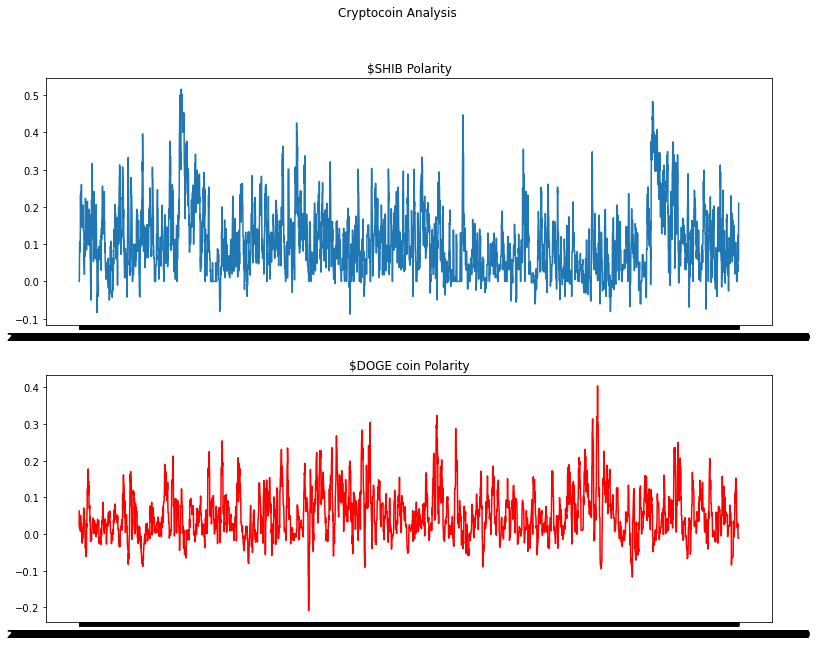

In [47]:
repub = 'red'
demo = 'green'
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(Shib['Timestamp'], Shib['MA Polarity'])
axes[0].set_title("\n".join(["$SHIB Polarity"]))
axes[1].plot(Doge['Timestamp'], Doge['MA Polarity'], color='red')
axes[1].set_title("\n".join(["$DOGE coin Polarity"]))

fig.suptitle("\n".join(["Crypto Analysis"]), y=0.98)

plt.show()